In [1]:
import sys
sys.path.append('/Users/pradap/Documents/Research/Python-Package/scaling/dmagellan/')

In [2]:
from dmagellan.blocker.attrequivalence.attr_equiv_blocker import AttrEquivalenceBlocker
from dmagellan.blocker.overlap.overlapblocker import OverlapBlocker
from dmagellan.blocker.blackbox.blackbox_blocker import BlackBoxBlocker
from dmagellan.blocker.rulebased.rule_based_blocker import RuleBasedBlocker
from dmagellan.feature.autofeaturegen import get_features_for_blocking

In [3]:
# imports
import py_entitymatching as em
from dask.sharedict import ShareDict, merge
from dask.dot import dot_graph

from dmagellan.optimization.dictutils import *
from dmagellan.utils.py_utils.sample_fns import test_create_dag

from dask.optimize import *

In [4]:
# dag1 = em.load_object('./dag-1.pkl')
# dag = dict(dag1.dask)   

b_dag = test_create_dag()
dag = dict(b_dag.dask)

Reading the files done


In [5]:
#  b_dag.visualize()

In [6]:
blocker_list = get_blocker_subgraphs(dag)

In [7]:
print_blocker_list_props(blocker_list)

{'iscand': False, 'type': 'AttrEquivalenceBlocker'}
{'iscand': True, 'type': 'RuleBasedBlocker'}
{'iscand': True, 'type': 'OverlapBlocker'}
{'iscand': True, 'type': 'BlackBoxBlocker'}


In [8]:
vis(blocker_list)

In [9]:
r_blocker_list = order_candset_blockers(blocker_list)

In [10]:
print_blocker_list_props(r_blocker_list)

{'iscand': False, 'type': 'AttrEquivalenceBlocker'}
{'iscand': True, 'type': 'OverlapBlocker'}
{'iscand': True, 'type': 'RuleBasedBlocker'}
{'iscand': True, 'type': 'BlackBoxBlocker'}


In [11]:
# def upd_blocker_inp_links(blocker_list):
#     for i in range(len(blocker_list) - 1):
#         cur = blocker_list[i]
#         nxt = blocker_list[i+1]
        
#         if i == 0:
#             # case: head
#             assert(iscand(cur) == False)
#             upd_split_df_input_node(nxt, get_keys(cur, 'add_id')[0])
#         else:
#             # case: candset
#             assert(iscand(cur) == True)
#             upd_split_df_input_node(nxt, get_keys(cur, 'concat_df')[0])
#     return blocker_list

In [12]:
u_blocker_list = upd_blocker_inp_links(r_blocker_list)

In [66]:
summarize_ltbls_rtbls(dict(convert_ldicts_to_sdict(u_blocker_list)))

{4513896464: 12,
 4513896592: 12,
 4513896976: 2,
 4513897168: 2,
 4513897360: 2,
 4513897552: 2}

In [13]:
comp(b_dag, u_blocker_list)

,_id,l_ID,r_ID,l_name,l_address,l_zipcode,r_name,r_address,r_zipcode
0,0,1,2,Michael Franklin,"1652 Stockton St, San Francisco",94122,Mike Franklin,"1652 Stockton St, San Francisco",94122
1,1,2,1,William Bridge,"3131 Webster St, San Francisco",94107,Bill Bridge,"3131 Webster St, San Francisco",94107
2,4,4,4,Alphonse Kemper,"1702 Post Street, San Francisco",94122,Alfons Kemper,"170 Post St, Apt 4, San Francisco",94122


In [14]:
import pandas as pd

In [15]:
isinstance(None, pd.DataFrame)

False

In [16]:
# print_blocker_list_props(u_blocker_list)

In [17]:
a_blocker_list = move_add_id_to_last(u_blocker_list)

In [18]:
vis(a_blocker_list)

In [19]:
comp(b_dag, a_blocker_list)

,_id,l_ID,r_ID,l_name,l_address,l_zipcode,r_name,r_address,r_zipcode
0,0,1,2,Michael Franklin,"1652 Stockton St, San Francisco",94122,Mike Franklin,"1652 Stockton St, San Francisco",94122
1,1,2,1,William Bridge,"3131 Webster St, San Francisco",94107,Bill Bridge,"3131 Webster St, San Francisco",94107
2,2,4,4,Alphonse Kemper,"1702 Post Street, San Francisco",94122,Alfons Kemper,"170 Post St, Apt 4, San Francisco",94122


In [20]:
# work on removing concat df, split df

# condns
# current blocker and the next blockers chunks must match



In [21]:
vis([a_blocker_list[0]])

In [22]:
c_blocker_list = remove_concat_split_for_blocker_list(a_blocker_list)

Processing 0 and 1
Processing 1 and 2
Processing 2 and 3


In [23]:
comp(b_dag, c_blocker_list)

,_id,l_ID,r_ID,l_name,l_address,l_zipcode,r_name,r_address,r_zipcode
0,0,1,2,Michael Franklin,"1652 Stockton St, San Francisco",94122,Mike Franklin,"1652 Stockton St, San Francisco",94122
1,1,2,1,William Bridge,"3131 Webster St, San Francisco",94107,Bill Bridge,"3131 Webster St, San Francisco",94107
2,2,4,4,Alphonse Kemper,"1702 Post Street, San Francisco",94122,Alfons Kemper,"170 Post St, Apt 4, San Francisco",94122


In [24]:
vis(c_blocker_list)

In [25]:
csd = dict(convert_ldicts_to_sdict(c_blocker_list))

In [45]:
get_keys(csd, '_block_table_part')

['_block_table_part-57b8fc91-68be-4ff1-8622-06c9b30a0915',
 '_block_table_part-258d6c0a-2552-4f2e-808e-ee2533603588',
 '_block_table_part-b430d6eb-77ec-41b3-b4b7-bc2e0246129f',
 '_block_table_part-14e99a8c-4c1b-49ff-abab-7d4ab93ac1b5']

In [52]:
k = '_block_table_part-57b8fc91-68be-4ff1-8622-06c9b30a0915'

In [53]:
ltbl = csd[k][1]
rtbl = csd[k][2]

In [50]:
id(ltbl), id(rtbl)

(4514928592, 4514517328)

In [56]:
c1_ltbl, c1_rtbl = csd[get_dependents(csd, k)[0]][2], csd[get_dependents(csd, k)[0]][3]

In [57]:
id(c1_ltbl)

4514836560

In [72]:
for head in get_keys(csd, '_block_table_part'):
    h_ltbl, h_rtbl = csd[head][1], csd[head][2]
    csd = set_ltable_rtable_for_cand_deps(csd, head, h_ltbl, h_rtbl, copy=False)

In [73]:
summarize_ltbls_rtbls(csd)

{4515974224: 4,
 4515974480: 4,
 4515990224: 4,
 4515990736: 4,
 4516070416: 4,
 4516071248: 4,
 4516071376: 4,
 4516285328: 4}

In [58]:
def doescontain_blockcandset(nodes):
    for node in nodes:
        if key_split(node) == '_block_candset_part':
            return True
    return False

def get_block_candset_node(nodes):
    l = []
    for node in nodes:
        if key_split(node) == '_block_candset_part':
            l.append(node)
    return l

In [69]:
def set_ltable_rtable_for_cand_deps(d, head, ltbl, rtbl, copy=True):
    if copy:
        d = deepcopy(d)
    
    while(True):
        deps = get_dependents(d, head)
        if doescontain_blockcandset(deps):
            candsetnode = get_block_candset_node(deps)
            assert len(candsetnode) == 1
            for n in candsetnode:
                #c1_ltbl, c1_rtbl = d[n][2], d[n][3]
                v = list(d[n])
                v[2] = ltbl
                v[3] = rtbl
                d[n] = tuple(v)
                
#                 d[n][2] = ltbl
#                 d[n][3] = rtbl
            else:
                break
    return d
        
    

In [63]:
def summarize_ltbls_rtbls(d):
    block_table_keys = get_keys(d, '_block_table_part')
    s = {}
    for key in block_table_keys:
        ltbl, rtbl = id(d[key][1]), id(d[key][2])
        
        if ltbl not in s:
            s[ltbl] = 1
        else:
            s[ltbl] = s[ltbl] + 1
            
        if rtbl not in s:
            s[rtbl] = 1
        else:
            s[rtbl] = s[rtbl] + 1
            
    block_candset_keys = get_keys(d, '_block_candset_part')
    for key in block_candset_keys:
        c_ltbl, c_rtbl = id(d[key][2]), id(d[key][3])
        if c_ltbl not in s:
            s[c_ltbl] = 1
        else:
            s[c_ltbl] = s[c_ltbl] + 1

        if c_rtbl not in s:
            s[c_rtbl] = 1
        else:
            s[c_rtbl] = s[c_rtbl] + 1
    
    
    
    return s
    

In [64]:
summarize_ltbls_rtbls(csd)

{4514517328: 2,
 4514836560: 4,
 4514837392: 4,
 4514837456: 4,
 4514838864: 4,
 4514839248: 4,
 4514839376: 4,
 4514839440: 2,
 4514839696: 2,
 4514928592: 2}

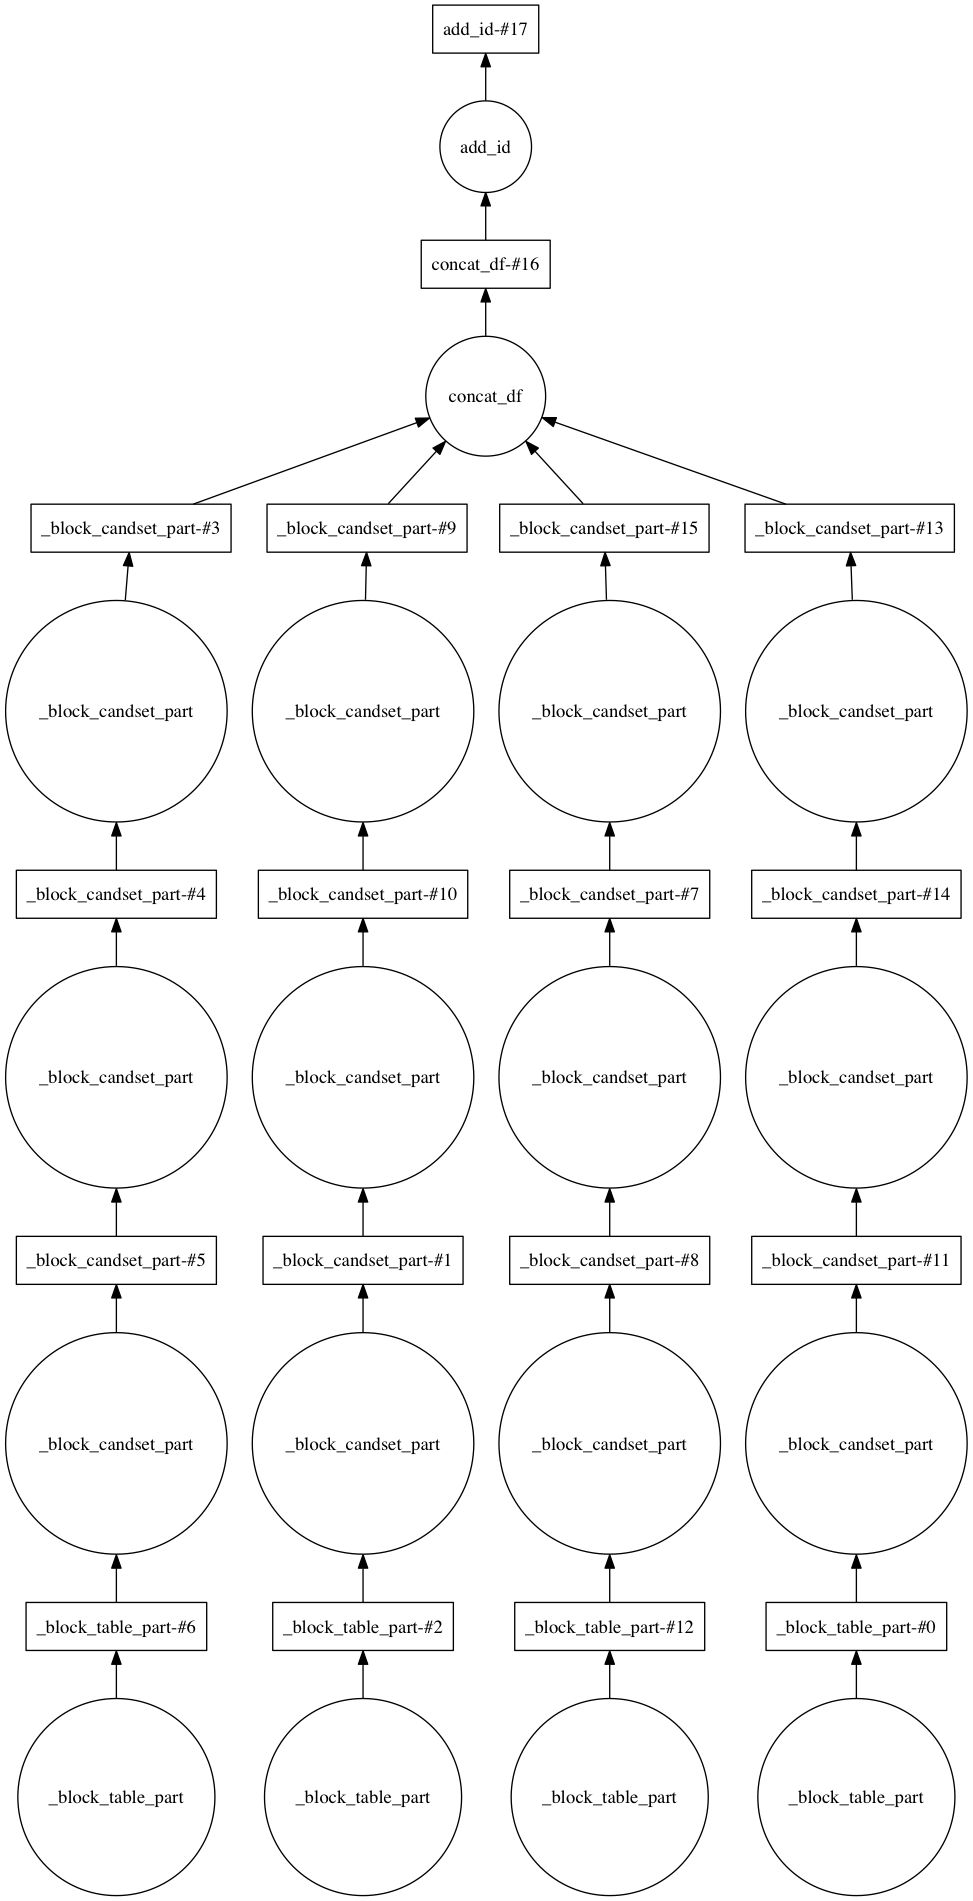

In [65]:
dot_graph(csd)

In [26]:
# a, _ = fuse_linear(csd, rename_keys=True)

In [27]:
# vis([a])

In [28]:
# comp(b_dag, [a])

In [29]:
# help(fuse_linear)

In [30]:
# dot_graph(csd)

In [31]:
# comp(b_dag, c_blocker_list)

In [32]:
# kk, ll = fuse(dict(convert_ldicts_to_sdict(c_blocker_list)), ave_width=1, rename_keys=True)

In [33]:
# ll

In [34]:
# vis([kk])

In [35]:
# d =dict(convert_ldicts_to_sdict(c_blocker_list))

In [36]:
# d.keys()

In [37]:
d =dict(convert_ldicts_to_sdict(c_blocker_list))
dsk, dep = cull(d, d.keys())
dsk, dep = fuse(dsk, ave_width=2, rename_keys=False)

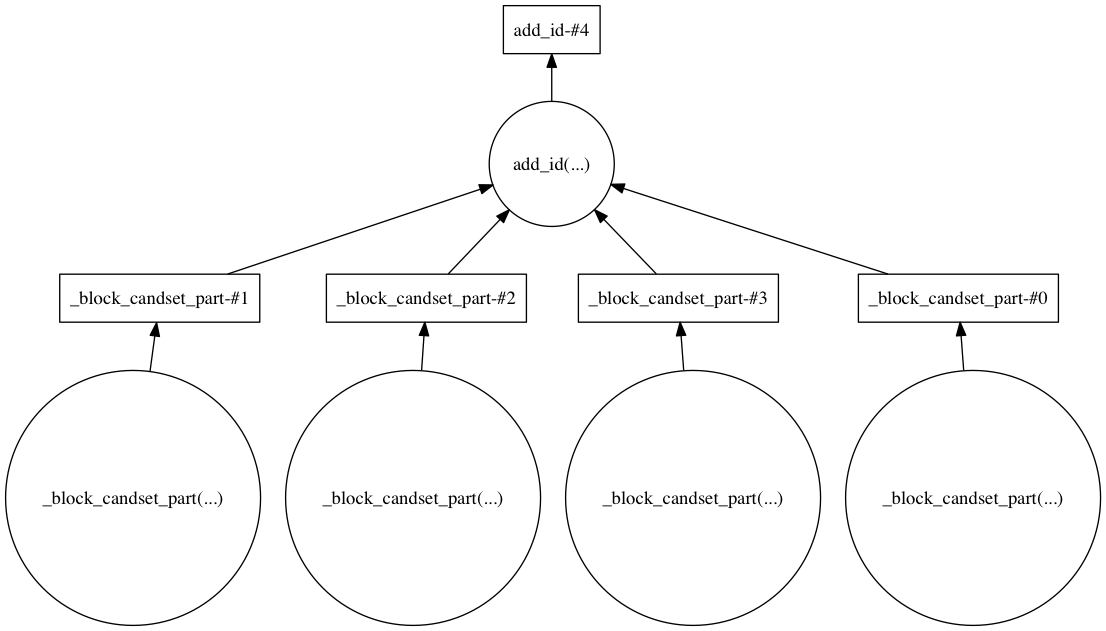

In [40]:
dot_graph(dsk)

In [39]:
comp_fuse(b_dag, [dsk], c_blocker_list)

,_id,l_ID,r_ID,l_name,l_address,l_zipcode,r_name,r_address,r_zipcode
0,0,1,2,Michael Franklin,"1652 Stockton St, San Francisco",94122,Mike Franklin,"1652 Stockton St, San Francisco",94122
1,1,2,1,William Bridge,"3131 Webster St, San Francisco",94107,Bill Bridge,"3131 Webster St, San Francisco",94107
2,2,4,4,Alphonse Kemper,"1702 Post Street, San Francisco",94122,Alfons Kemper,"170 Post St, Apt 4, San Francisco",94122


In [ ]:
from dask.core import flatten

In [ ]:
# dsk

In [ ]:
# dot_graph(dsk)

In [ ]:
# from dask import compute

In [ ]:
# kk

In [ ]:
# help(dask.compute)

In [ ]:
# comp(b_dag, [kk])

In [ ]:
# _b = convert_ldicts_to_sdict(k)

In [ ]:
# a, b = fuse_linear(_b)

In [ ]:
# dot_graph(_b)

In [ ]:
# kk, ll = fuse(dict(_b), ave_width=1)

In [ ]:
# ll.keys()

In [ ]:
# kk

In [ ]:
# from dask.optimize import cull

In [ ]:
# cull(kk)

In [ ]:
# dot_graph(kk, rankdir='LR')

In [ ]:
# concat_df2 = get_keys(a_blocker_list[1], 'concat_df')[0]
# get_dependencies(b2, concat_df2)[0]

In [ ]:
# recurse_dep_keys(b2, 'getitem-77c4b3672503164cb291255ca87407f0')

In [ ]:
# get_dependencies(b2, get_dependencies(b2, get_dependencies(b2, get_dependencies(b2, concat_df2)[0])[0])[0])

In [ ]:
# def inc(t):
#     return t + 1

In [ ]:
# d = {'a': 1, 'b': (inc, 'a'), 'c': (inc, 'b')}

In [ ]:
# dot_graph(d)

In [ ]:
# kk, ll = fuse(d)

In [ ]:
# kk